In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# pictures of tree
from graphviz import Source

# datasets
from sklearn.datasets import load_iris, make_moons

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

In [23]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]]
y_iris = iris.target

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
y_iris.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=["petal length (cm)", "petal width (cm)"],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

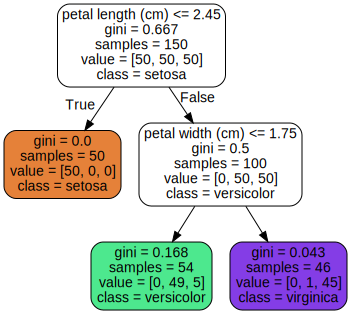

In [32]:
Source.from_file("iris_tree.dot")

In [87]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [88]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularisierung

In [89]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [90]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [91]:
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [92]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [93]:
# result of tree1
display(accuracy_score(tree_clf1.predict(X_moons_test), y_moons_test))
tree_clf1.score(X_moons_test, y_moons_test)

0.898

0.898

In [94]:
# result of tree2
display(accuracy_score(tree_clf2.predict(X_moons_test), y_moons_test))
tree_clf2.score(X_moons_test, y_moons_test)

0.92

0.92

# Regression

In [95]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from graphviz import Source

In [96]:
np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025*np.random.randn(200,1)

In [97]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [98]:
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=["petal length (cm)", "petal width (cm)"],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

In [99]:
export_graphviz(
        tree_reg, out_file='test_tree_regression.dot', rounded=True, filled=True
)

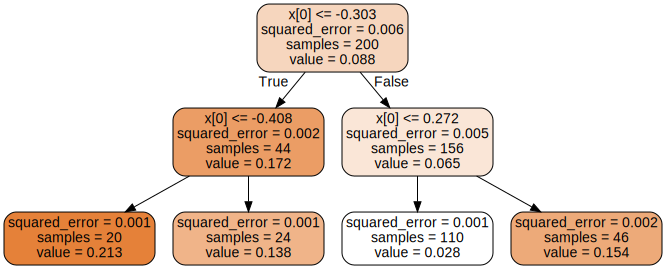

In [100]:
Source.from_file("test_tree_regression.dot")

In [101]:
X_iris

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# Decision tree is sensitive to the direction of the axes.

- deshalb is es empfehlenswert, eine geeignete Skalierung und dann PCA furchzuführen, um besser Entscheidungsgrenzen zu unterscheiden

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [103]:
pca_pipeline =  make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)

In [104]:
X_iris_rotated[:5]

array([[-1.87784285,  0.01752368],
       [-1.87784285,  0.01752368],
       [-1.91803298,  0.05771381],
       [-1.83765272, -0.02266645],
       [-1.87784285,  0.01752368]])

In [105]:
X_iris_rotated.shape

(150, 2)

In [106]:
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)

In [107]:
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [108]:
np.log2(1e+6)

19.931568569324174

# Ein paar Aufgaben

## Aufgabe 7

In [109]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [113]:
param = {'max_leaf_nodes':[1,4,10]}

In [114]:
mytree = DecisionTreeClassifier(random_state=42)

In [115]:
mygrid = GridSearchCV(mytree, param, cv=5)

In [116]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [1, 4, 10]})

In [117]:
mygrid.best_params_

{'max_leaf_nodes': 4}

In [118]:
# use direct mygrid, because gridsearchcv already trained on training set
mygrid.score(X_test, y_test)

0.863

In [119]:
# or similarly
accuracy_score(mygrid.predict(X_test), y_test)

0.863

## Aufgabe 8

In [120]:
X_train.shape

(8000, 2)

### Test sufflespit

### Aufgabe

In [121]:
from sklearn.model_selection import ShuffleSplit

In [122]:
X_train.shape

(8000, 2)

In [123]:
y_train.shape

(8000,)

In [124]:
n_trees = 1000
n_instances = 100

mini_sets = []
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

In [125]:
rs.split(X_train)

<generator object BaseShuffleSplit.split at 0x000001C6579F6940>

In [126]:
# use tuple() to see the result, similar to enumerate or zip
tuple(rs.split(X_train))

((array([4798, 1500, 3843, 5225, 2613, 3461, 1021, 3073, 7555, 3943, 1585,
         1955, 3152, 6349,   34, 4014,  775, 2556, 7595, 1478, 7099, 5486,
         6235, 1363, 7041, 2612, 7513, 2824, 2041,  241, 2061, 2363,  600,
         2435, 5393, 6310, 2888, 6164,  646, 3890, 3556, 3202, 1528, 6975,
         1267, 7734, 1899, 4658, 3005, 2734, 7101,  189, 1806,  975, 2747,
         7643, 2047, 7849, 2558, 1082,  474, 7728, 2904, 4843, 6396, 4117,
         3385, 4555, 1184, 6420, 5051, 5311, 2433, 6949, 7581, 5611, 2391,
          769, 7476, 1685,  130, 7831, 2919, 3171, 3444, 6231, 5578, 4426,
         5334,  466, 6265, 5734, 3092, 3772, 5191, 5226, 5390,  860, 7603,
         7270]),
  array([2215, 2582, 1662, ..., 5675, 6873, 6545])),
 (array([7773, 3342, 3848,  604, 5368, 1521, 2078, 3373, 7225, 2311, 4883,
         4343, 1471, 6996, 1982, 5109, 4466,  199, 6676,  485, 6975, 3270,
         4724, 5728, 2823, 4551, 6026, 5336, 3245, 4453, 3901, 5817, 3161,
         3749, 2202,  437,  14

In [127]:
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index] 
    mini_sets.append((X_mini_train, y_mini_train))

In [128]:
len(mini_sets)

1000

In [129]:
len(mini_sets[0])

2

In [130]:
mini_sets[0][1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [131]:
mygrid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [132]:
mygrid.best_params_

{'max_leaf_nodes': 4}

In [133]:
from sklearn.base import clone

In [134]:
n_trees

1000

In [135]:
forest = [clone(mygrid.best_estimator_) for _ in range(n_trees)]

In [136]:
my_scores = []

In [137]:
# train on each small tree
for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    my_scores.append(tree.score(X_test, y_test))

In [138]:
# train on each small tree
# for train_set in forest:
#     tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
#     tree.fit(train_set[0], train_set[1])
#     my_scores.append(tree.score(X_test, y_test))

In [139]:
len(my_scores)

1000

In [140]:
np.mean(my_scores)

0.8347645

In [141]:
y_test.shape

(2000,)

In [142]:
from scipy.stats import mode

In [143]:
# For each test set instance, generate the predictions of the 1,000 Decision Trees, 
# and keep only the most frequent prediction (you can use SciPy's mode() function for this). 
# This gives you majority-vote predictions over the test set.

Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

In [144]:
# so we have 1000 trees and 2000 instances
Y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [145]:
Y_pred.shape

(1000, 2000)

In [146]:
# very khôn is hier!
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [147]:
# majority vote
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [148]:
Y_pred

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
y_pred_majority_votes

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
n_votes

array([ 998,  980,  978, ...,  980, 1000,  832], dtype=int64)

In [151]:
y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
y_pred_majority_votes.shape

(2000,)

In [153]:
y_pred_majority_votes.reshape([-1])

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
# new accuracy score
accuracy_score(y_pred_majority_votes, y_test)

0.8715

In [155]:
# compare to before, which is 
mygrid.score(X_test, y_test)

0.863

In [156]:
# test flatten use reshape(-1) or reshape([-1])
a = np.array([[0,1], [1,2], [2,3]])

In [157]:
a

array([[0, 1],
       [1, 2],
       [2, 3]])

In [158]:
a.reshape(-1)

array([0, 1, 1, 2, 2, 3])

# Test hyperparameters and params

In [159]:
tree_test = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=25, min_samples_split=2
                                   , min_samples_leaf=1, max_features=10, max_leaf_nodes=50)

In [165]:
tree_test.min_samples_split = 20

In [166]:
tree_test

DecisionTreeClassifier(max_depth=25, max_features=10, max_leaf_nodes=50,
                       min_samples_split=20)